In [1]:
import scipy as sp
from scipy import stats
from scipy.stats import norm
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')
'''
def write_numbers_to_file(input_file, output_file):
    with open(input_file, 'r') as file:
        numbers = file.read().replace('\n', '').split()
    
    with open(output_file, 'w') as file:
        for num in numbers:
            file.write(num + '\n')
input_file = 'uni_unsorted.txt'
output_file = 'output.txt'

write_numbers_to_file(input_file, output_file)

def sort_numbers_in_file(input_file, output_file):
    with open(input_file, 'r') as file:
        lines = file.readlines()
    
    numbers = []
    for line in lines:
        line_numbers = line.strip().split()
        numbers.extend(line_numbers)
    
    sorted_numbers = sorted(numbers, key=float)
    
    with open(output_file, 'w') as file:
        for i, num in enumerate(sorted_numbers):
            file.write(num)
            if (i + 1) % 10 == 0:
                file.write('\n')
            elif i < len(sorted_numbers) - 1:
                file.write(' ')


input_file = 'uni_unsorted.txt'
output_file = 'output1.txt'

sort_numbers_in_file(input_file, output_file)
'''

"\ndef write_numbers_to_file(input_file, output_file):\n    with open(input_file, 'r') as file:\n        numbers = file.read().replace('\n', '').split()\n    \n    with open(output_file, 'w') as file:\n        for num in numbers:\n            file.write(num + '\n')\ninput_file = 'uni_unsorted.txt'\noutput_file = 'output.txt'\n\nwrite_numbers_to_file(input_file, output_file)\n\ndef sort_numbers_in_file(input_file, output_file):\n    with open(input_file, 'r') as file:\n        lines = file.readlines()\n    \n    numbers = []\n    for line in lines:\n        line_numbers = line.strip().split()\n        numbers.extend(line_numbers)\n    \n    sorted_numbers = sorted(numbers, key=float)\n    \n    with open(output_file, 'w') as file:\n        for i, num in enumerate(sorted_numbers):\n            file.write(num)\n            if (i + 1) % 10 == 0:\n                file.write('\n')\n            elif i < len(sorted_numbers) - 1:\n                file.write(' ')\n\n\ninput_file = 'uni_unsorted.

Проверка статистических гипотез с помощью критерия хи^2 и критерия Колмогорова


In [2]:
n = 10
N = 200
V = 14

def get_ni(data):
    myDict={}
    for x in data:
        if x in myDict:
            myDict[x]+=1
        else:
            myDict[x]=1
    return myDict

color='c'

def get_wi(data):
    W={}
    for xi, ni in data.items():
        W[xi]=round(ni/N, 5)
    return W

def get_si(W):
    S={}
    s=0
    for xi, wi in W.items():
        s+=wi
        S[xi]=round(s,5)
    return S

def get_lists(W, N):
    xlist, wlist, nlist=[], [], []
    for xi, wi in W.items():
        xlist.append(xi)
        wlist.append(wi)
        nlist.append(N[xi])
    return np.array(xlist),np.array(wlist), np.array(nlist)

def printStRyad(xlist,nlist, wlist):
    print("\nСтатист. ряд")
    print("xi\tni\twi")
    for i in range(len(xlist)):
        print(f"{xlist[i]}\t{nlist[i]}\t{wlist[i]}")
    print("Сумма {0} {1} ".format(nlist.sum(), wlist.sum().round(5)))
    
def draw_polygons(Xlist, Wlist, plist):
    figure(figsize=(8, 6), dpi=90)
    plt.xlabel("X")
    plt.ylabel("W|P")
    plt.plot(Xlist, Wlist, marker='o', color='r', label='Полигон отн. частот')
    plt.plot(Xlist, plist, marker ='o', color = 'b', label='Полигон теор. вероятностей')
    plt.grid(color=color, linestyle='-', linewidth=0.3)
    plt.legend()
    plt.show() 
    
def getMean(Xlist, Wlist):
    return round((Xlist * Wlist).sum(),5)

def getDisp(Xlist, Wlist, mean, h):
    return round(((Xlist-mean)**2 * Wlist).sum() ,5)

def getSigma(D):
    sigma=D**0.5
    return round(sigma, 5)

def printIntRyad(Alist, Nlist, Wlist):
    print("Интервальный ряд:\n")
    for i in range(1, len(Alist)):
        print("({0},{1}]\t{2}\t{3:1.3f}".format(Alist[i-1], Alist[i], Nlist[i-1], Wlist[i-1]))
    print("Сумма:\t{0}\t{1}".format(Nlist.sum(), Wlist.sum()))

def table1(Xlist, Wlist, Plist):
    print("\nСравнение wi и pi:")
    print("Xi\twi\tpi\t|wi-pi|\tN(w-p)^2/p")
    absD=np.zeros(len(Plist))
#     Wlist=np.array(newWlist)
    Xi = (N*(Wlist-Plist)**2 / (Plist)).round(5)
    absD=(np.abs(Wlist-Plist)).round(5)
    for i in range(len(Plist)):
        print("{0}\t{1}\t{2}\t{3}\t{4}".format(Xlist[i], Wlist[i], Plist[i], absD[i], Xi[i]))
    
    res=Xi.sum().round(5)
    print("\t{0}\t{1}\t{2}".format(Wlist.sum().round(5), round(Plist.sum(), 5), absD.max()),res)
    return len(Plist), res


Интервальный ряд:

(0,0.26955]	68	0.340
(0.26955,0.5391]	45	0.225
(0.5391,0.80865]	29	0.145
(0.80865,1.0782]	20	0.100
(1.0782,1.34775]	18	0.090
(1.34775,1.6173]	8	0.040
(1.6173,1.88685]	7	0.035
(1.88685,2.15643]	5	0.025
Сумма:	200	1.0
0.60919 
Оценка лямбда L =  1.64152

k	a	f(a, l)	F(a,l)	p*
0	0	1.64152	0	-
1	0.26955	1.05459	0.35755	0.35755
2	0.5391	0.67752	0.58726	0.22971
3	0.80865	0.43527	0.73484	0.14758
4	1.0782	0.27964	0.82965	0.09481
5	1.34775	0.17965	0.89056	0.06091
6	1.6173	0.11542	0.92969	0.03913
7	1.88685	0.07415	0.95483	0.02514
8	2.15643	0.04763	0.97098	0.04517
				1.0


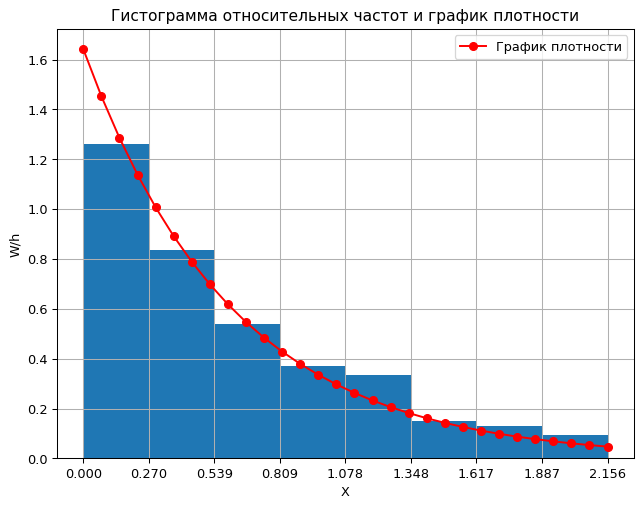


Таблица
1	(0,0.26955]	0.34	0.35755	0.01755	0.17228
2	(0.26955,0.5391]	0.225	0.22971	0.00471	0.01931
3	(0.5391,0.80865]	0.145	0.14758	0.00258	0.00902
4	(0.80865,1.0782]	0.1	0.09481	0.00519	0.05682
5	(1.0782,1.34775]	0.09	0.06091	0.02909	2.77862
6	(1.34775,1.6173]	0.04	0.03913	0.00087	0.00387
7	(1.6173,1.88685]	0.035	0.02514	0.00986	0.77343
8	(1.88685,2.15643]	0.025	0.04517	0.02017	1.80132
				1.0	1.0	0.02909	5.61467

Выборочное Xi^2 5.61467


In [3]:
def getLists(Data, Type="Norm", a=None, b=None):
    N=len(Data)
    m=1 + int(np.log2(N))
    
    a0=Data[0]
    aM=Data[-1]
    
    if Type == "Norm":
        a0=Data[0]
        aM=Data[-1]
    elif Type == "Expon":
        a0, aM=0,Data[-1]
    else:
        a0, aM=a, b
    h=round((aM-a0)/m,5)
    Alist=[]
    ai=a0
    while ai <= aM+0.0001:
        Alist.append(round(ai,5))
        ai+=h
    Alist[-1]=aM
    
    Nlist=np.zeros(len(Alist)-1, dtype=np.int64)
    i,j=0,1
    try:
        k=0
        while k < len(Data):
            num=Data[k]
            if num > Alist[j-1] - 0.0001 and num <= Alist[j]+0.0001:
                Nlist[i]+=1        
            else:
                j+=1
                i+=1
                k-=1
            k+=1
    except:
        print(Alist)
        print(k, j, i)
        #             if num > Alist[j-1] and num <= Alist[j]+0.0001:
#             Nlist[i]+=1
    
    Wlist=np.round(Nlist/N,5)
    
    Xlist=np.zeros(len(Alist)-1)
    for i in range(1,len(Alist)):
        Xlist[i-1]=round((Alist[i-1] + Alist[i])/2,5)
    
    return Alist, Nlist,Wlist, Xlist, h

def plotHist(Data, Alist, xlist, ylist):
    plt.figure(figsize=(8, 6), dpi=93)
    plt.hist(Data, bins = Alist, density=True)
    plt.xlabel('X')
    plt.ylabel('W/h')
    plt.title('Гистограмма относительных частот и график плотности')

    plt.plot(xlist, ylist, marker ='o', color = 'r', label='График плотности')
    plt.xticks(Alist)
    plt.legend()
    plt.grid(True)
    plt.show()

def Table2(Alist, Wlist, Plist):
    print("\nТаблица")
    Xi=(N*(Wlist-Plist)**2/Plist).round(5)
    absD=np.abs(Wlist-Plist).round(5)
    for i in range(1, len(Alist)):
        print("{0}\t({1},{2}]\t{3}\t{4}\t{5}\t{6}".format(i, Alist[i-1], Alist[i], Wlist[i-1], Plist[i-1],absD[i-1], Xi[i-1]))
    
    res=Xi.sum().round(5)

    print("\t\t\t\t{0}\t{1}\t{2}\t{3}".format(round(Wlist.sum(),5), round(Plist.sum(),5), absD.max(), res))
    
    return len(Plist), res 


def f(x, L):
    return round(L* np.exp(-L*x), 5)
    
def F(x, L):
    return round(1-np.exp(-L*x), 5)

def exponTable1(alist, l):
    print("\nk\ta\tf(a, l)\tF(a,l)\tp*")
    print("{0}\t{1}\t{2}\t{3}\t{4}".format(0,0, f(0,l), 0, '-'))
    plist=np.zeros(len(alist)-1, float)
    flist=np.array([f(a, l) for a in alist ])
    Flist=[F(a, l) for a in alist ]
    for i in range(1,len(alist)-1):
        plist[i-1]=round(Flist[i]-Flist[i-1], 5)
        print("{0}\t{1}\t{2}\t{3}\t{4}".format(i, alist[i], flist[i], Flist[i], plist[i-1]))
        
    i=len(alist)-1
    plist[i-1]=round(1-Flist[i-1], 5)
    print("{0}\t{1}\t{2}\t{3}\t{4}".format(i, alist[i], flist[i], Flist[i], plist[i-1]))     
        
    print("\t\t\t\t{0}".format(plist.sum().round(5)))
    return plist

with open('expon.txt', 'r') as file:
    expon_data = np.array([float(row.strip()) for row in file])
    
with open('expon_unsorted.txt','w') as file:
    for row in expon_data.reshape(20,10):
        for x in row:
            file.write(str(x)+"\t")
        file.write("\n")      
expon_data.sort()
with open('expon_sorted.txt','w') as file:
    for row in expon_data.reshape(20,10):
        for x in row:
            file.write(str(x)+"\t")
        file.write("\n")

exponAlist, exponNlist, exponWlist, exponXlist, h=getLists(expon_data, Type="Expon")
Mean=getMean(exponXlist, exponWlist)
L = round(1/Mean, 5)

printIntRyad(exponAlist, exponNlist, exponWlist)

print(Mean, "\nОценка лямбда L = ", L)

exponPlist =exponTable1(exponAlist, L)

xlist = np.linspace(exponAlist[0], exponAlist[-1], 30)
ylist = np.array([f(x, L) for x in xlist])
plotHist(expon_data, exponAlist, xlist, ylist)

exponM, exponXi=Table2(exponAlist, exponWlist, exponPlist)
print("\nВыборочное Xi^2", exponXi)

"Задание 2 - проверка гипотезы о нормальном распределении"

In [4]:
def fi(x, a, sigma):
    return 1/(2*np.pi)**0.5 *np.exp(-x**2/2)

def Fi(z):
    return norm.cdf(z)

def normTable1(alist, a, sigma):
    zlist=np.array([(ak-a)/sigma for ak in alist]).round(5)
    filist=np.array([1/sigma*fi(z,a, sigma) for z in zlist]).round(5)
    Filist=np.array([Fi(z) for z in zlist]).round(5)
    print("\nk\ta\tZ\t1/sigma*fi(z)\tФ(z)\tp*")
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}".format(0,alist[0], zlist[0], filist[0], Filist[0],'-'))
    plist=np.zeros(len(alist)-1, float)
   # print("Ответ:",round(Filist[0], 5))
    for i in range(1,len(alist)-1):
        plist[i-1]=round(Filist[i]-Filist[i-1], 5)
        plist[0]=Filist[1]
        print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}".format(i, alist[i], zlist[i], filist[i], Filist[i], plist[i-1]))
    i=len(alist)-1
    plist[i-1]=round(1-Filist[i-1], 5)
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}".format(i, alist[i], zlist[i], filist[i], Filist[i], plist[i-1]))
    print("\t"*4, plist.sum().round(5))
    return plist


Интервальный ряд:

(-1.75805,-0.97173]	6	0.030
(-0.97173,-0.18541]	10	0.050
(-0.18541,0.60091]	29	0.145
(0.60091,1.38723]	32	0.160
(1.38723,2.17355]	53	0.265
(2.17355,2.95987]	47	0.235
(2.95987,3.74619]	16	0.080
(3.74619,4.53249]	7	0.035
Сумма:	200	1.0

a = 1.6074 Sigma^2 = 1.54055

k	a	Z	1/sigma*fi(z)	Ф(z)	p*
0	-1.75805	-2.71147	0.00814	0.00335	-
1	-0.97173	-2.07795	0.03711	0.01886	0.01886
2	-0.18541	-1.44443	0.11325	0.07431	0.05545
3	0.60091	-0.81091	0.23136	0.20871	0.1344
4	1.38723	-0.17739	0.3164	0.4296	0.22089
5	2.17355	0.45613	0.28966	0.67585	0.24625
6	2.95987	1.08966	0.17752	0.86207	0.18622
7	3.74619	1.72318	0.07283	0.95757	0.0955
8	4.53249	2.35668	0.02	0.99078	0.04243
				 1.0


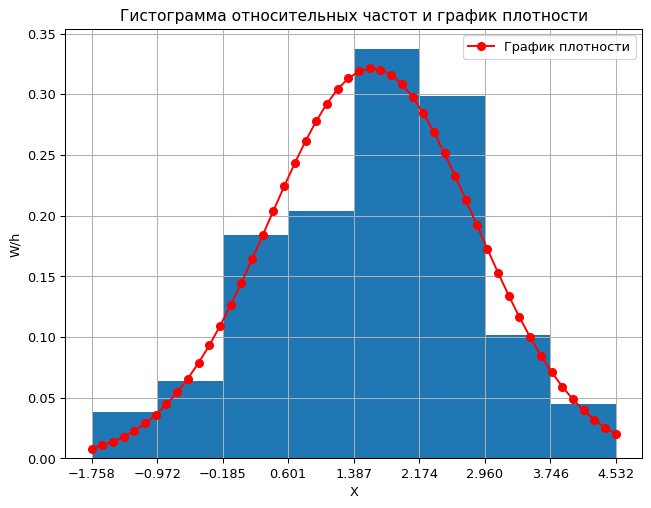


Таблица
1	(-1.75805,-0.97173]	0.03	0.01886	0.01114	1.31601
2	(-0.97173,-0.18541]	0.05	0.05545	0.00545	0.10713
3	(-0.18541,0.60091]	0.145	0.1344	0.0106	0.1672
4	(0.60091,1.38723]	0.16	0.22089	0.06089	3.35696
5	(1.38723,2.17355]	0.265	0.24625	0.01875	0.28553
6	(2.17355,2.95987]	0.235	0.18622	0.04878	2.55557
7	(2.95987,3.74619]	0.08	0.0955	0.0155	0.50314
8	(3.74619,4.53249]	0.035	0.04243	0.00743	0.26022
				1.0	1.0	0.06089	8.55176

Выборочное Xi^2 8.55176


In [8]:

with open('norm.txt', 'r') as file:
    norm_data = np.array([float(row.strip()) for row in file])
with open('norm_unsorted.txt','w') as file:
    for row in norm_data.reshape(20,10):
        for x in row:
            file.write(str(x)+"\t")
        file.write("\n")
norm_data.sort()
with open('norm_sorted.txt','w') as file:
    for row in norm_data.reshape(20,10):
        for x in row:
            file.write(str(x)+"\t")
        file.write("\n")

normAlist, normNlist, normWlist, normXlist, h=getLists(norm_data)
printIntRyad(normAlist, normNlist, normWlist)
Mean=getMean(normXlist, normWlist)
Disp=getDisp(normXlist, normWlist, Mean, h)
Sigma=getSigma(Disp)
a = Mean
print("\na =", a, "Sigma^2 =", Disp )

normPlist=normTable1(normAlist, a, Sigma)

xlist=np.linspace(normAlist[0], normAlist[-1], 50)
ylist=[norm.pdf(x, loc=a, scale=Sigma) for x in xlist]
plotHist(norm_data, normAlist,xlist,ylist)

normM, normXi=Table2(normAlist, normWlist, normPlist)
print("\nВыборочное Xi^2", normXi)

Задание 3 - проверка гипотезы о равномерном распределении

Интервальный ряд:

(1.0,1.495]	26	0.130
(1.495,1.99]	24	0.120
(1.99,2.485]	27	0.135
(2.485,2.98]	24	0.120
(2.98,3.475]	25	0.125
(3.475,3.97]	32	0.160
(3.97,4.465]	20	0.100
(4.465,4.96]	22	0.110
Сумма:	200	1.0

Таблица
1	(1.0,1.495]	0.13	0.125	0.005	0.04
2	(1.495,1.99]	0.12	0.125	0.005	0.04
3	(1.99,2.485]	0.135	0.125	0.01	0.16
4	(2.485,2.98]	0.12	0.125	0.005	0.04
5	(2.98,3.475]	0.125	0.125	0.0	0.0
6	(3.475,3.97]	0.16	0.125	0.035	1.96
7	(3.97,4.465]	0.1	0.125	0.025	1.0
8	(4.465,4.96]	0.11	0.125	0.015	0.36
				1.0	1.0	0.035	3.6

k	a	f	F	p*
0	1.0	0.25253	0.0	-
1	1.495	0.25253	0.125	0.125
2	1.99	0.25253	0.25	0.125
3	2.485	0.25253	0.375	0.125
4	2.98	0.25253	0.5	0.125
5	3.475	0.25253	0.625	0.125
6	3.97	0.25253	0.75	0.125
7	4.465	0.25253	0.875	0.125
8	4.96	0.25253	1.0	0.125
				 1.0


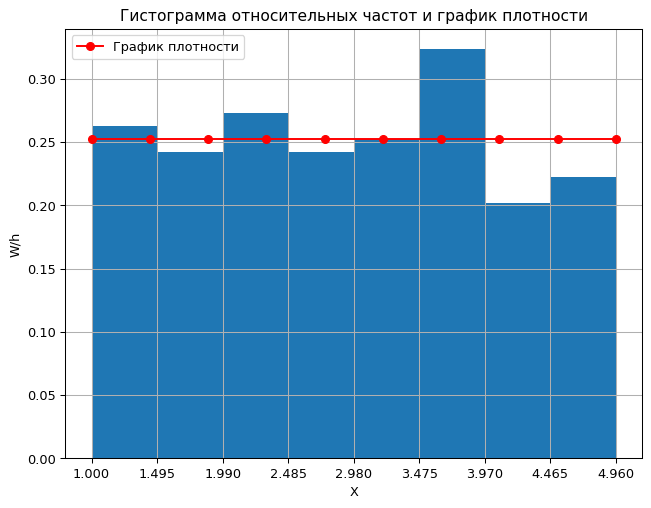


Выборочное Xi^2 3.6


In [10]:
def getUniformPlist(Alist, A, B):
    P=np.zeros(len(Alist)-1)
    for i in range(1, len(Alist)):
        pi=uniform.cdf(Alist[i],loc=A, scale=B-A ) - uniform.cdf(Alist[i-1], loc=A, scale=B-A)
        P[i-1]=pi
    return P.round(5)

def uniTable1(alist, a, b):
    filist = np.array([1/(b-a) for i in alist]).round(5)
    Filist = np.array([(ak-a)/(b-a) for ak in alist]).round(5)

    print("\nk\ta\tf\tF\tp*")
    print("{0}\t{1}\t{2}\t{3}\t{4}".format(0, alist[0], filist[0], Filist[0],'-'))
   
    plist=np.zeros(len(alist)-1, float)
    for i in range(1,len(alist)-1):
        plist[i-1]=round(Filist[i]-Filist[i-1], 5)
        plist[0]=Filist[1]
        print("{0}\t{1}\t{2}\t{3}\t{4}".format(i, alist[i], filist[i], Filist[i], plist[i-1]))
    
    i=len(alist)-1
    plist[i-1]=round(1-Filist[i-1], 5)
    print("{0}\t{1}\t{2}\t{3}\t{4}".format(i, alist[i], filist[i], Filist[i], plist[i-1]))     
        
    print("\t"*4, plist.sum().round(5))
    return plist

A = 1.00
B = 4.96

with open('uni.txt', 'r') as file:
    uni_data = np.array([float(row.strip()) for row in file])
with open('uni_unsorted.txt','w') as file:
    for row in uni_data.reshape(20,10):
        for x in row:
            file.write(str(x)+"\t")
        file.write("\n")
uni_data.sort()
with open('uni_sorted.txt','w') as file:
    for row in uni_data.reshape(20,10):
        for x in row:
            file.write(str(x)+"\t")
        file.write("\n")

uniAlist, uniNlist, uniWlist, uniXlist, h=getLists(uni_data, Type="uni", a=A,b=B)
printIntRyad(uniAlist, uniNlist, uniWlist)

uniPlist=getUniformPlist(uniAlist,A,B)
uniM, uniXi=Table2(uniAlist, uniWlist, uniPlist)

unilist=uniTable1(uniAlist, A, B)

xlist=np.linspace(A,B,10)
ylist=np.zeros(10)+1/(B-A)
plotHist(uni_data, uniAlist,xlist,ylist)

print("\nВыборочное Xi^2", uniXi)

Задание 4 - проверка гипотезы о равномерном распределении


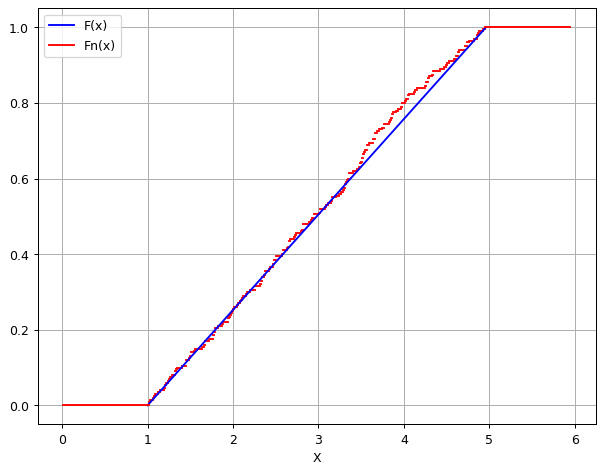

Вычисление выборочного значения
1.0	4.96	200	0.05183	0.73299	4.06175	0.77317	0.825 	0.82


In [11]:
def plotF(X, xlist, ylist):
    plt.figure(figsize=(8, 6), dpi=90)
    for i in range(1, len(X)):
        xl=np.linspace(X[i-1], X[i],3)
        yl=np.zeros(3)+i/N
        plt.plot(xl, yl,color='r')
    
    plt.plot(xlist, ylist, color='b', label='F(x)')
    xl=np.linspace(X[0]-1, X[0],3)
    yl=np.zeros(3)
    plt.plot(xl, yl,color='r')
    xl=np.linspace(X[-1], X[-1]+1,3)
    yl=np.ones(3)
    plt.plot(xl, yl,color='r', label='Fn(x)')
    plt.xlabel("X")
    plt.grid(True)
    plt.legend()
    plt.show()

xlist=np.linspace(A,B,20)
ylist=np.array([(x-A)/(B-A) for x in xlist])
plotF(uni_data, xlist, ylist)

Fnlist=np.array([j/N for j in range(1, N+1)])
Fnlist0=np.array([j/N for j in range(0, N)])
Flist=np.array([(x-A)/(B-A) for x in uni_data])

res1=abs(Fnlist-Flist).round(5)
res2=abs(Fnlist0-Flist).round(5)
j=res1.argmax()
Dn1=round(max(res1.max(), res2.max()),5)

x=uni_data[j]
DnN1=round(Dn1 * N**0.5, 5)
print("Вычисление выборочного значения")
print(f"{A}\t{B}\t{N}\t{Dn1}\t{DnN1}\t{x}\t{round((x-A)/(B-A),5)}\t{round((j+1)/N,5)} \t{round(j/N,5)}")

Задание 5 - проверка гипотезы о показательном распределении

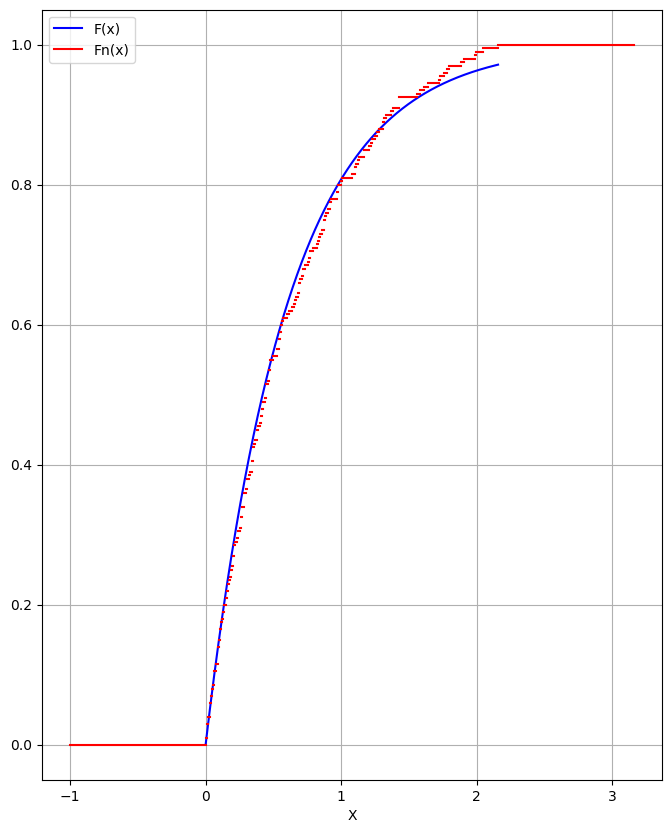

In [57]:
l = 1.650

def F(x):
    return 1 - np.exp(-1.650 * x)
    
def plotF(X, xlist, ylist):
    plt.figure(figsize=(8, 10), dpi=100)

    xll = np.linspace(0, max(X), 10000)
    fs = [F(val) for val in xll]
    plt.plot(xll, fs, color = 'b', label = 'F(x)')
    
    for i in range(1, len(X)):
        xl=np.linspace(X[i-1], X[i],3)
        yl=np.zeros(3)+i/N
        plt.plot(xl, yl,color='r')

    xl=np.linspace(X[0]-1, X[0],3)
    yl=np.zeros(3)
    plt.plot(xl, yl,color='r')
    xl=np.linspace(X[-1], X[-1]+1,3)
    yl=np.ones(3)
    plt.plot(xl, yl,color='r', label='Fn(x)')
    plt.xlabel("X")

    plt.grid(True)
    plt.legend()
    plt.show()

xlist=np.linspace(exponAlist[0], exponAlist[-1], 3)
ylist=np.array([f(x, L) for x in xlist])
plotF(expon_data, xlist, ylist)

A = 0
B = 4.14562


In [58]:
Fnlist=np.array([j/N for j in range(1, N+1)])
Fnlist0=np.array([j/N for j in range(0, N)])
Flist=np.array([1 - np.exp(-l*x) for x in expon_data])

res1=abs(Fnlist-Flist).round(5)
res2=abs(Fnlist0-Flist).round(5)
j=res1.argmax()
print(j)
Dn2=round(max(res1.max(), res2.max()),5)

x=expon_data[j]
print(x)
DnN2=round(Dn2 * N**0.5, 5)
print("Вычисление выборочного значения")
print(f"{A}\t{B}\t{N}\t{Dn2}\t{DnN2}\t{x}\t{round(1 - np.exp(-l*x), 5)}\t{round((j+1)/N,5)} \t{round(j/N,5)}")

def checkCriteria():
    pCrit=[0, 3.8, 6.0, 7.8, 9.5, 11.1, 12.6, 14.1, 15.5]
 
    l=exponM-2
    if exponXi <= pCrit[l]:
        print("Показательное не противоречит")
    else:
        print("Показательное противоречит")
    print("Выборочное:{0} l:{1} Критическое:{2}\n".format(exponXi, l, pCrit[l]))
    
    l=normM-3
    if normXi <= pCrit[l]:
        print("Нормальное не противоречит")
    else:
        print("Нормальное противоречит")
    print("Выборочное:{0} l:{1} Критическое:{2}\n".format(normXi, l, pCrit[l]))
    
    l=uniM-1
    if uniXi <= pCrit[l]:
        print("Равномерное не противоречит")
    else:
        print("Равномерное противоречит")
    print("Выборочное:{0} l:{1} Критическое:{2}\n".format(uniXi, l, pCrit[l]))
    
    if DnN1 <= 1.36:
        print("Равномерное не противоречит критерию Колмогорова ")
    else:
        print("Равномерное противоречит критерию Колмогорова ")
    print("Dn1*sqrtN:{0} Критическое:{1}\n".format(DnN1, 1.36))

    if DnN2 <= 1.36:
        print("Равномерное не противоречит критерию Колмогорова ")
    else:
        print("Равномерное противоречит критерию Колмогорова ")
    print("Dn2*sqrtN:{0} Критическое:{1}".format(DnN2, 1.36))
checkCriteria()

78
0.33967
Вычисление выборочного значения
0	4.14562	200	0.03905	0.55225	0.33967	0.42905	0.395 	0.39
Показательное не противоречит
Выборочное:5.61467 l:6 Критическое:12.6

Нормальное не противоречит
Выборочное:8.55176 l:5 Критическое:11.1

Равномерное не противоречит
Выборочное:3.6 l:7 Критическое:14.1

Равномерное не противоречит критерию Колмогорова 
Dn1*sqrtN:0.73299 Критическое:1.36

Равномерное не противоречит критерию Колмогорова 
Dn2*sqrtN:0.55225 Критическое:1.36
